<a href="https://colab.research.google.com/github/kellychan3/Bank_Customer_Churn_Analysis/blob/main/Bank_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🏦 Bank Customer Churn Data Analysis**

---

## Introduction
**Purpose**: The goal of this project is to predict customer churn in a bank by building an Artificial Neural Network (ANN) model. By analyzing customer demographics, account activity, and financial information, the model aims to identify customers likely to leave the bank.

**Dataset Overview**: The dataset Churn_Modelling.csv contains 10,000 records of bank customers, each representing individual customer information and account activity. It includes features such as demographics, credit score, balance, number of products, and estimated salary, along with behavioral indicators like credit card ownership and activity status.
The target variable, “Exited”, specifies whether a customer has left the bank (1) or remains a client (0).

**Feature Description**:
- CustomerId: Unique identifier for each customer.
- Surname: Customer’s last name.
- CreditScore:	Customer’s credit score (higher values indicate better creditworthiness).
- Geography:	Country of residence.
- Gender:	Customer’s gender.
- Age:	Customer’s age.
- Tenure:	Number of years the customer has been with the bank.
- Balance:	Account balance of the customer.
- NumOfProducts:	Number of bank products the customer holds (e.g., savings, credit card, loan).
- HasCrCard:	Indicates whether the customer has a credit card (1 = Yes, 0 = No).
- IsActiveMember:	Indicates whether the customer is actively using bank services (1 = Active, 0 = Inactive).
- EstimatedSalary:	Estimated annual income of the customer.
- Exited:	Target variable: 1 = Customer has left the bank, 0 = Customer remains.






---

## Import Library & Dataset
Essential libraries are imported for data handling, visualization, and model building.
NumPy and Pandas are used for data manipulation, Matplotlib and Seaborn for visualization, and Keras/TensorFlow for building the neural network.

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
churn_data = pd.read_csv('Churn_Modelling.csv', index_col='RowNumber')

The dataset Churn_Modelling.csv is then loaded and inspected using head(), info(), and describe() to understand its structure and basic statistics.

In [ ]:
churn_data.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


The dataset contains 10,000 customer records with 13 features and no missing values, ensuring data completeness for analysis.

In [ ]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- CreditScore ranges from 350 to 850, with an average of around 650, indicating most customers have moderate to good credit standing.
- Age ranges from 18 to 92 years, with an average of about 39 years, showing that the majority of customers are middle-aged.
- Balance varies widely from 0 to 250,898, suggesting that some customers have no balance while others maintain high deposits.
- The average tenure is around 5 years, showing moderate customer loyalty.
- On average, customers hold 1 to 2 products, and around 70% have a credit card while about 51% are active members.
- The churn rate (Exited) is about 20%, meaning one in five customers has left the bank.

---

## Data Cleaning
Data cleaning is essential to prepare the dataset for analysis and modeling.
This step removes irrelevant columns, converts categorical features into numerical format, and ensures the data is consistent and ready for machine learning.

Specifically, non-informative columns (CustomerId, Surname) are dropped, while Geography and Gender are encoded into numeric variables for further processing.

In [ ]:
churn_data.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
Geography_dummies = pd.get_dummies(prefix='Geo', data=churn_data, columns=['Geography'])

In [ ]:
Geography_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
4,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [ ]:
Gender_dummies = Geography_dummies.replace(to_replace={'Gender':{'Female': 1, 'Male':0}})

/tmp/ipython-input-2325364982.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Gender_dummies = Geography_dummies.replace(to_replace={'Gender':{'Female': 1, 'Male':0}})


In [ ]:
Gender_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
2,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
3,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
4,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
5,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [ ]:
churn_data_encoded = Gender_dummies

---

## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) helps to understand the structure of the dataset and identify patterns that may influence customer churn.
- Objective: Explore and visualize key relationships and distributions within the data to uncover factors that differentiate customers who stayed from those who left.

Count plots are used to examine class imbalance in the target variable (Exited).

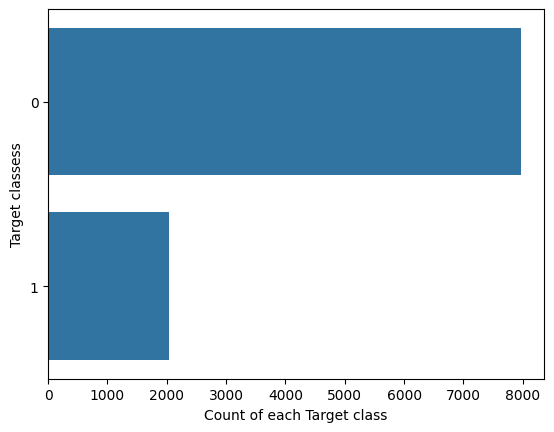

In [ ]:
sns.countplot(y=churn_data_encoded. Exited , data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classess")
plt.show()

- The target variable distribution shows that around 80% of customers remained with the bank while 20% exited.
- This indicates an imbalanced dataset, where non-churned customers significantly outnumber churned ones.

Histograms reveal feature distributions.

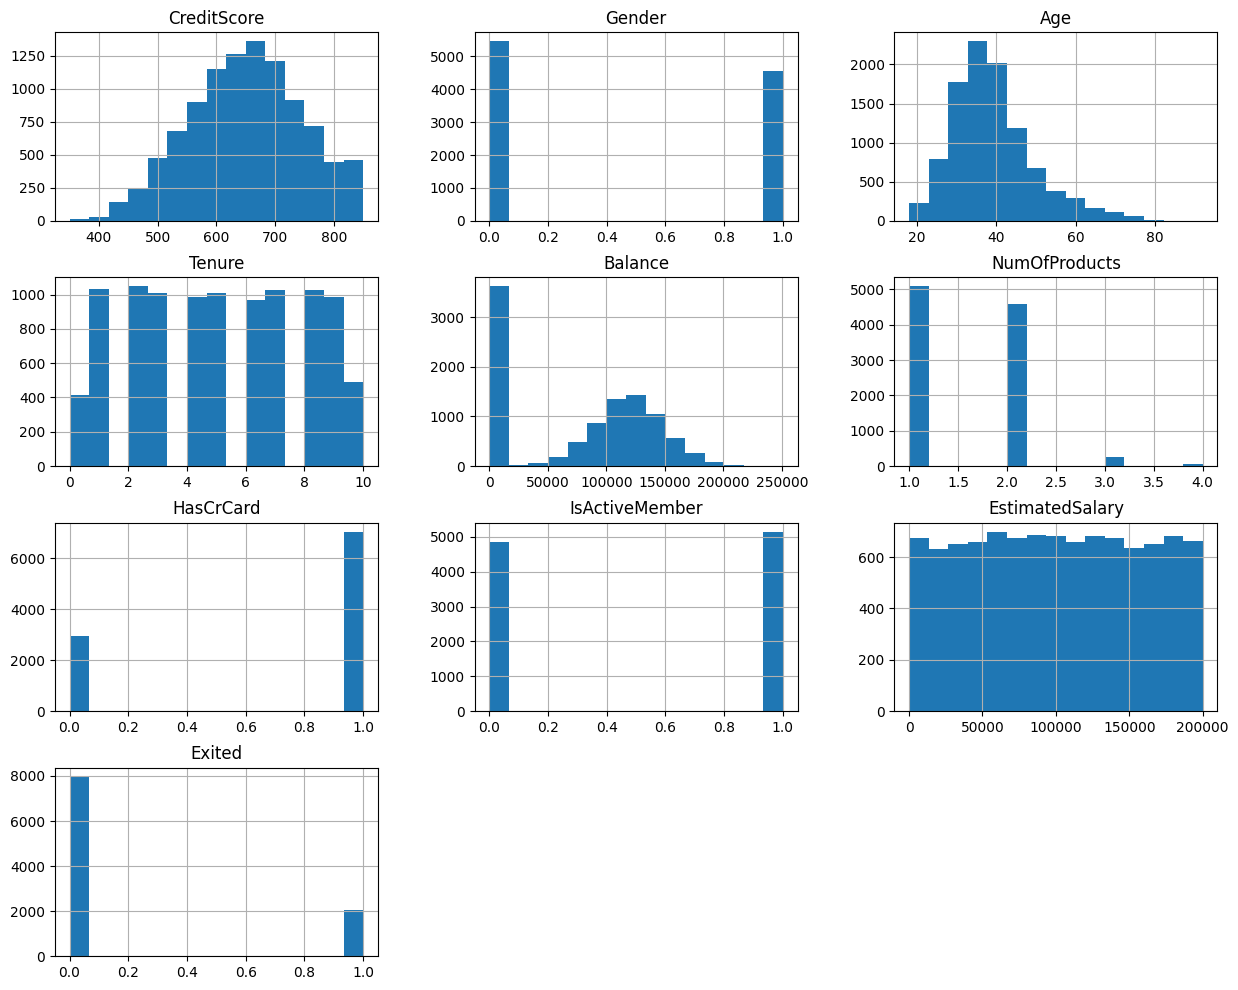

In [ ]:
churn_data_encoded.hist(figsize = (15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

- The histograms show that most features are well-distributed with no significant outliers.
- Most customers are aged 30–45, have 1–2 products, and around 20% have churned.
- Balance is slightly skewed, while salary is evenly distributed.

Correlation heatmap highlights relationships between numerical variables.

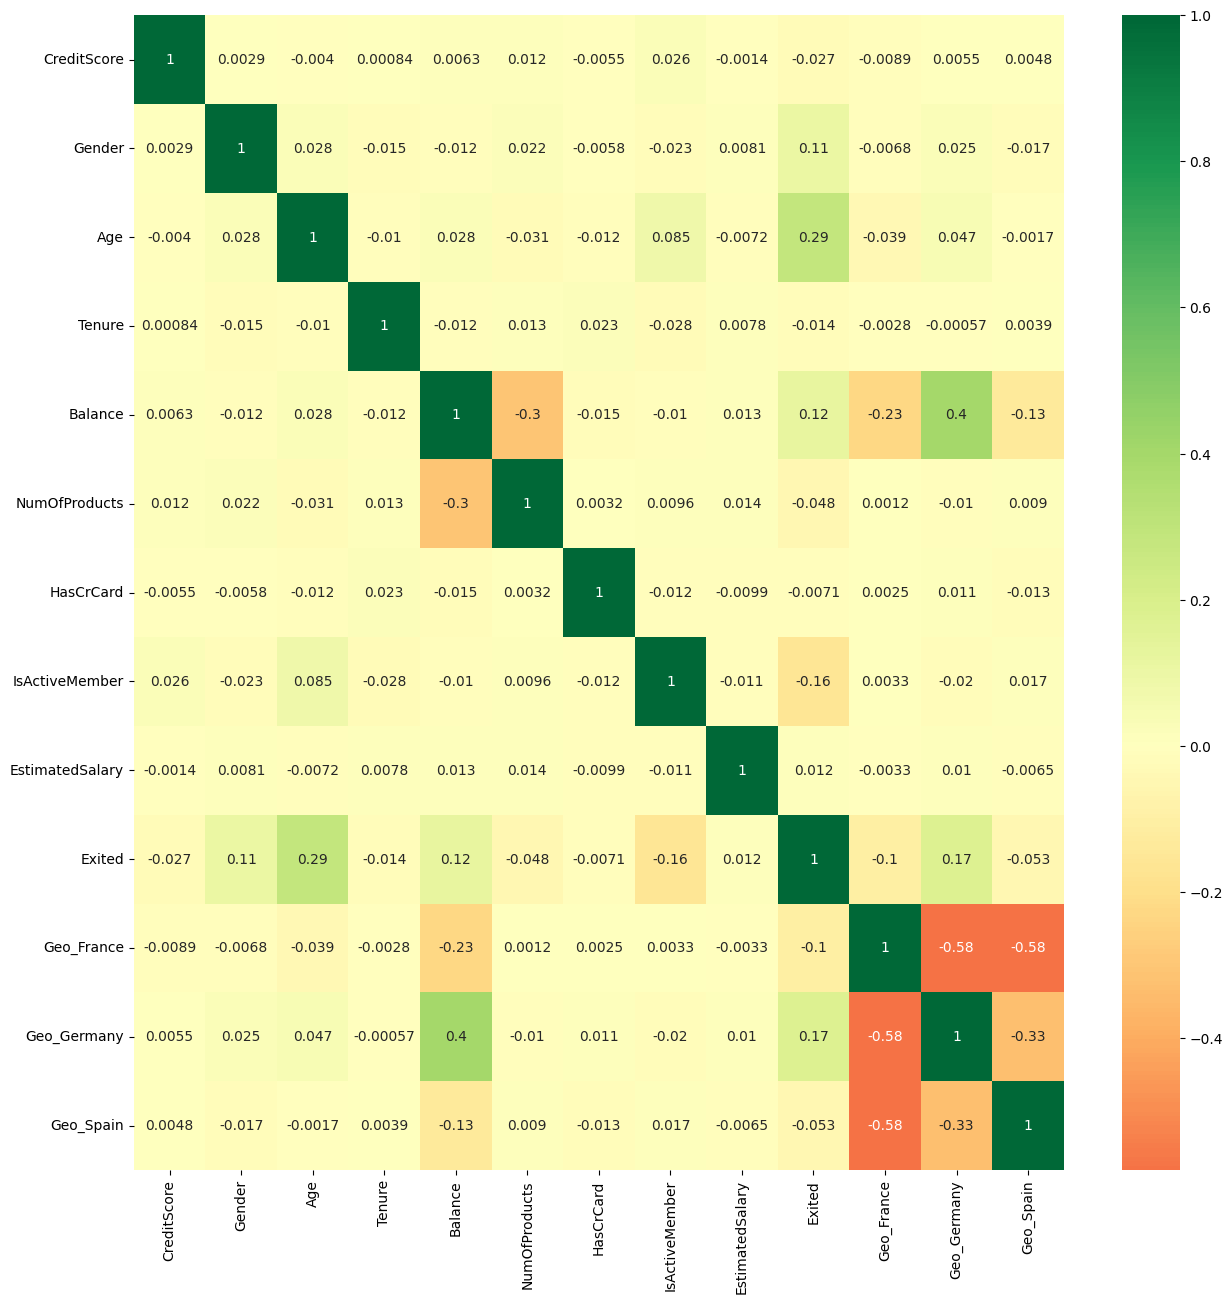

In [ ]:
plt.figure(figsize=(15,15))
p = sns.heatmap(churn_data_encoded.corr(), annot=True, cmap='RdYlGn', center=0)

The correlation heatmap shows the relationships between numerical features and the target variable Exited (customer churn).
- Age (0.29) → The strongest positive correlation with churn, meaning older customers are more likely to leave the bank.
- IsActiveMember (-0.16) → Moderate negative correlation; active members are less likely to churn.
- Balance (0.12) → Slight positive correlation; customers with higher balances tend to leave slightly more often.
- Geography (Geo_Germany: 0.17, Geo_France: -0.10) → Customers from Germany are more likely to churn, while those from France are less likely.
- Other features (CreditScore, Tenure, EstimatedSalary, etc.) show very weak or no correlation with churn.
- Overall, there is no strong multicollinearity among features (no pairs with correlation > 0.8), meaning the dataset is suitable for modeling.

Boxplots compare feature variations across churned and retained customers, providing insights into which attributes most strongly impact churn behavior.

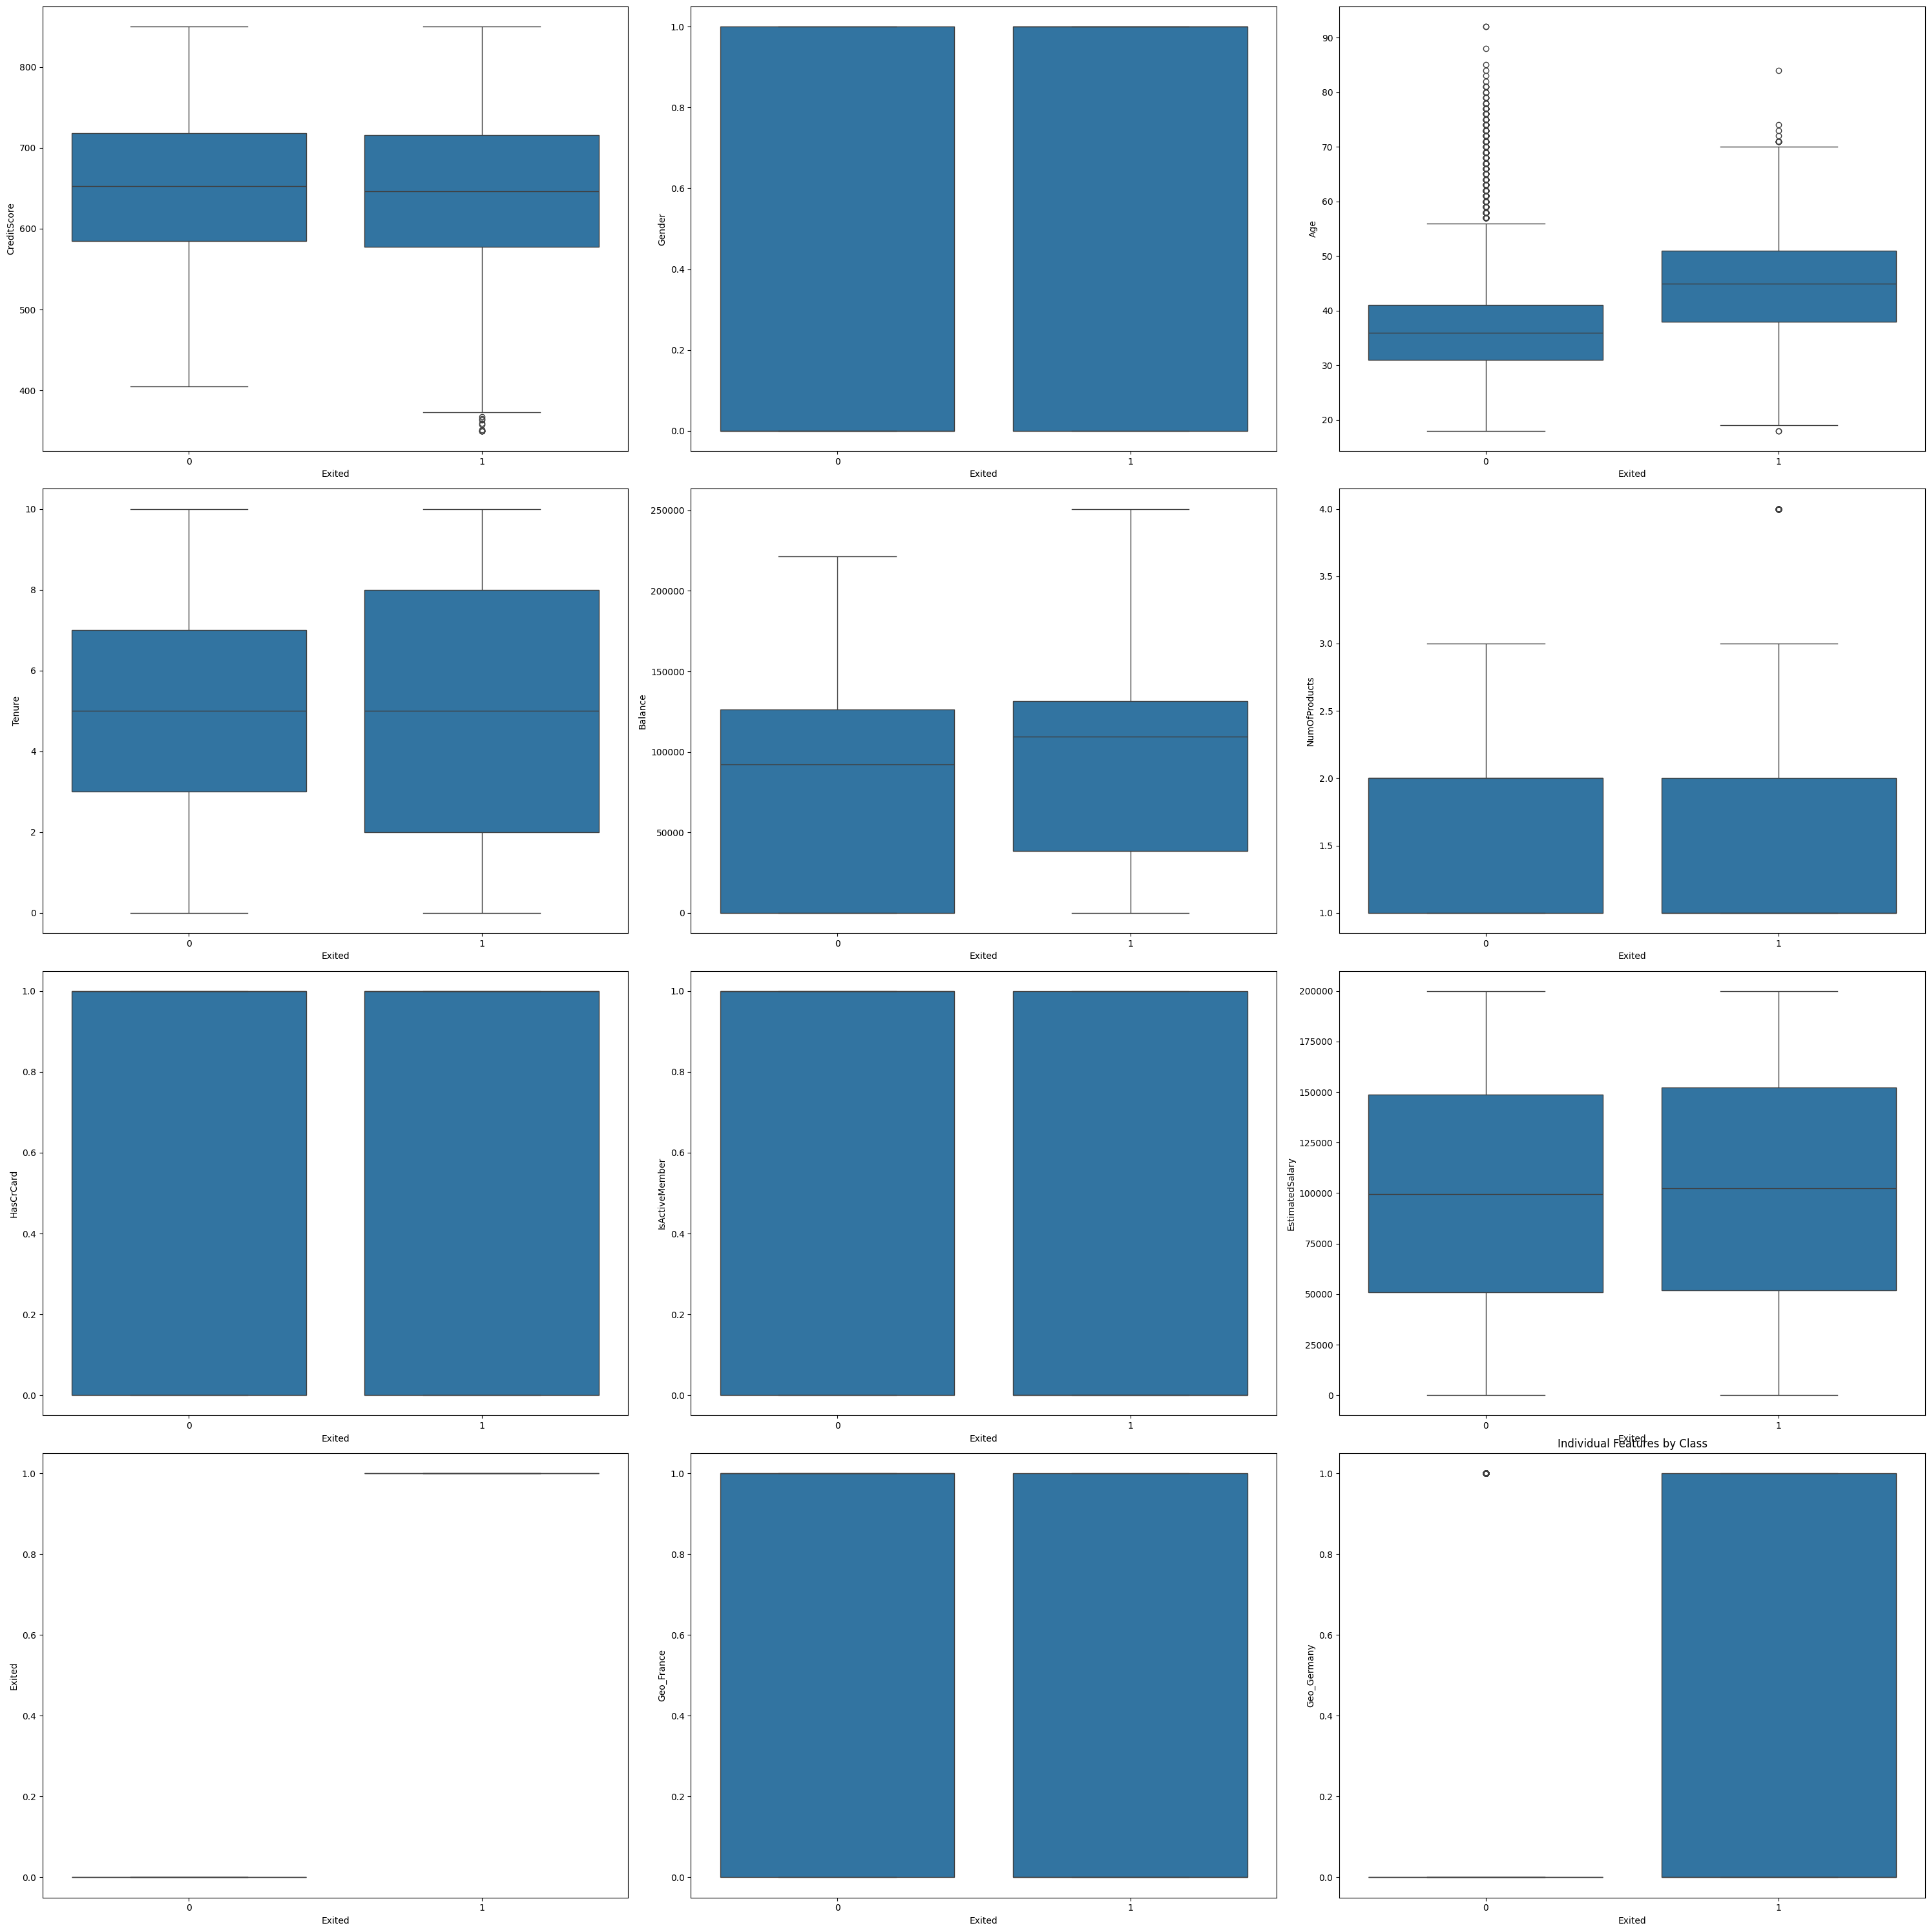

In [ ]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
  if col > 2:
    row += 1
    col = 0
  axes = ax[row, col]
  sns.boxplot(x = churn_data_encoded['Exited' ], y = churn_data_encoded[churn_data_encoded.columns[i]],ax = axes)
  col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

The analysis reveals several strong predictors for customer churn:
- Age: Older customers are significantly more likely to churn.
- Balance: Customers with higher bank balances have a greater tendency to leave. Conversely, customers with a zero balance are very loyal.
- Geography: Customers from Germany show a noticeably higher churn rate.

---

## Data Preparation
The dataset is divided into features (X) and the target variable (y) to separate input variables from the output class (Exited).

In [ ]:
X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [ ]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,True,False,False
2,608,1,41,1,83807.86,1,0,1,112542.58,False,False,True
3,502,1,42,8,159660.80,3,1,0,113931.57,True,False,False
4,699,1,39,1,0.00,2,0,0,93826.63,True,False,False
5,850,1,43,2,125510.82,1,1,1,79084.10,False,False,True


The data is then split into training and testing sets using train_test_split(), with 67% for training and 33% for testing, ensuring the model can be properly evaluated on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state = 0)

---

## Feature Scaling
Feature scaling is applied using StandardScaler() to normalize the range of independent variables. This step ensures that all numerical features contribute equally during model training and prevents bias toward features with larger values.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---

## Model Building
An Artificial Neural Network (ANN) was built using the Keras Sequential API.
The model architecture consists of:
- An input layer with 12 features,
- Two hidden layers, each with 6 neurons and ReLU activation, and
- An output layer with 1 neuron using sigmoid activation for binary classification.

The model was compiled with the Adam optimizer and binary cross-entropy loss, and trained for 100 epochs with a batch size of 10.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid' ) )

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy' ])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose =0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---

## Model Evaluation
Model performance is evaluated on both training and test datasets to assess how well the model has learned from the data and how effectively it generalizes to unseen samples.

In [ ]:
# Evaluation on training set
score, acc = classifier.evaluate(X_train, y_train, batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print('*'*20)
score, acc = classifier.evaluate(X_test, y_test, batch_size=10)

print('Test score:', score)
print('Test accuracy:', acc)

670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8385 - loss: 0.3970
Train score: 0.396249383687973
Train accuracy: 0.8359701633453369
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
********************
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8436 - loss: 0.3914
Test score: 0.4027586877346039
Test accuracy: 0.8409090638160706


- The ANN model achieves about 84% accuracy with no signs of overfitting, indicating good overall performance.
- However, since the dataset is imbalanced, further evaluation using recall and F1-score is essential to confirm how well the model identifies actual churn cases.

Metrics such as accuracy, confusion matrix, precision, recall, and F1-score are used to measure classification performance and identify potential issues like class imbalance or overfitting.

Text(0.5, 23.52222222222222, 'Predicted label')

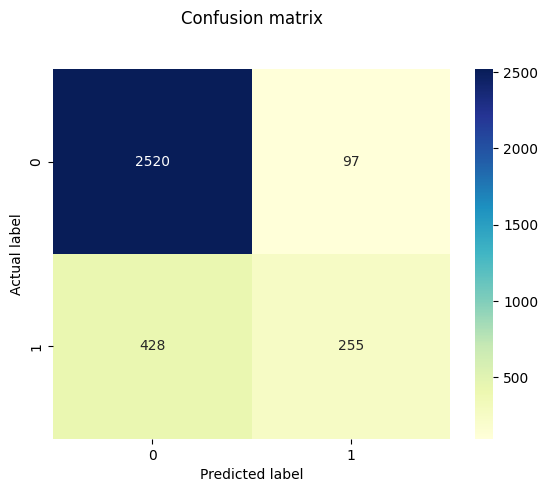

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

p=sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label' )

Confusion Matrix Interpretation:
- True Negative (2520): 2520 customers were correctly predicted to stay with the bank.
- True Positive (255): 255 customers were correctly predicted to churn.
- False Positive (97): 97 customers were incorrectly predicted to churn but actually stayed (false alarms).
- False Negative (428): 428 customers were incorrectly predicted to stay but actually churned (missed cases).

Conclusion:
- The model performs well in identifying non-churn customers but struggles to detect churn cases accurately, as indicated by the relatively high number of false negatives. This suggests that while the model is generally reliable, improvements are needed to better capture customers at risk of leaving.

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91      2617
           1       0.72      0.37      0.49       683

    accuracy                           0.84      3300
   macro avg       0.79      0.67      0.70      3300
weighted avg       0.83      0.84      0.82      3300



- Precision: The model is more precise in predicting customers who will stay (Class 0) correct about 85% of the time. For churned customers (Class 1), it is correct 72% of the time.
- Recall: The model successfully identifies 96% of customers who stay, but only 37% of those who churn. This shows that the model misses many actual churn cases (high false negatives).
- F1-score: The F1-score combines precision and recall, confirming that performance for staying customers is strong, but much weaker for churned customers.
- Accuracy: The model correctly classifies 84% of all cases, which indicates a fairly good overall performance.
- Macro Average and Weighted Average: These show that the imbalance between churn and non-churn customers affects the overall performance.